# Analisando dados da Covid-19 no Brasil

Este projeto analisa dados de COVID-19 no estado de São Paulo utilizando séries temporais.
O objetivo é explorar a evolução de casos, óbitos, suspeitos e recuperados neste estado, gerar insights e preparar os dados para análise exploratória e modelagem preditiva.

São Paulo foi escolhido por ser o estado com maior número de casos e óbitos no Brasil, permitindo uma análise mais detalhada.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings('ignore')

Importações de bibliotecas que iremos utilizar no projeto

In [142]:
df_total = pd.read_csv('dataset//cases-brazil-states_1.csv')

Base de dados coletada em https://github.com/wcota/covid19br.

Aqui fica meu agradecimento por esse rico trabalho realizado por Wesley Cota para alimentar essa base de dados, que com a mudança de metodologia pelo Ministério da Saúde para atualização semanal dos dados, esta fonte principal não recebeu mais atualizações a partir do dia 18 de março de 2023. Para evitar inconsistências, foi decidida a não atualização dos dados a partir de tal data.

In [143]:
df_total.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

Todas as colunas da base de dados

In [144]:
df_total.drop(['vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'], inplace=True, axis=1)

Colunas dropadas

In [145]:
df_total = df_total.rename(columns={
    "epi_week": "semana",
    "date": "data",
    "country": "pais",
    "state": "estado",
    "city": "cidade",
    "newDeaths": "novosObitos",
    "deaths": "Obitos",
    "newCases": "novosCasos",
    "totalCases": "Casos",
    "deathsMS": "obitosMS",
    "totalCasesMS": "casosMS",
    "deaths_per_100k_inhabitants": "obitos_por_100k",
    "totalCases_per_100k_inhabitants": "casos_por_100k",
    "deaths_by_totalCases": "obitos_por_casos",
    "recovered": "recuperados",
    "suspects": "suspeitos",
    "tests": "testes",
    "tests_per_100k_inhabitants": "testes_por_100k"
})

Colunas renomeadas para PT-BR

In [146]:
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


Nossos primeiros dados. Vamos trabalhar apenas com os dados dos estados, e para isso precisaremos dropar todas as linhas que contém TOTAL na coluna "estado", tendo em vista que essas linhas refere-se ao total de casos em todo o País.

In [147]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Seleção dos dados e transformação da coluna data em um objeto datetime

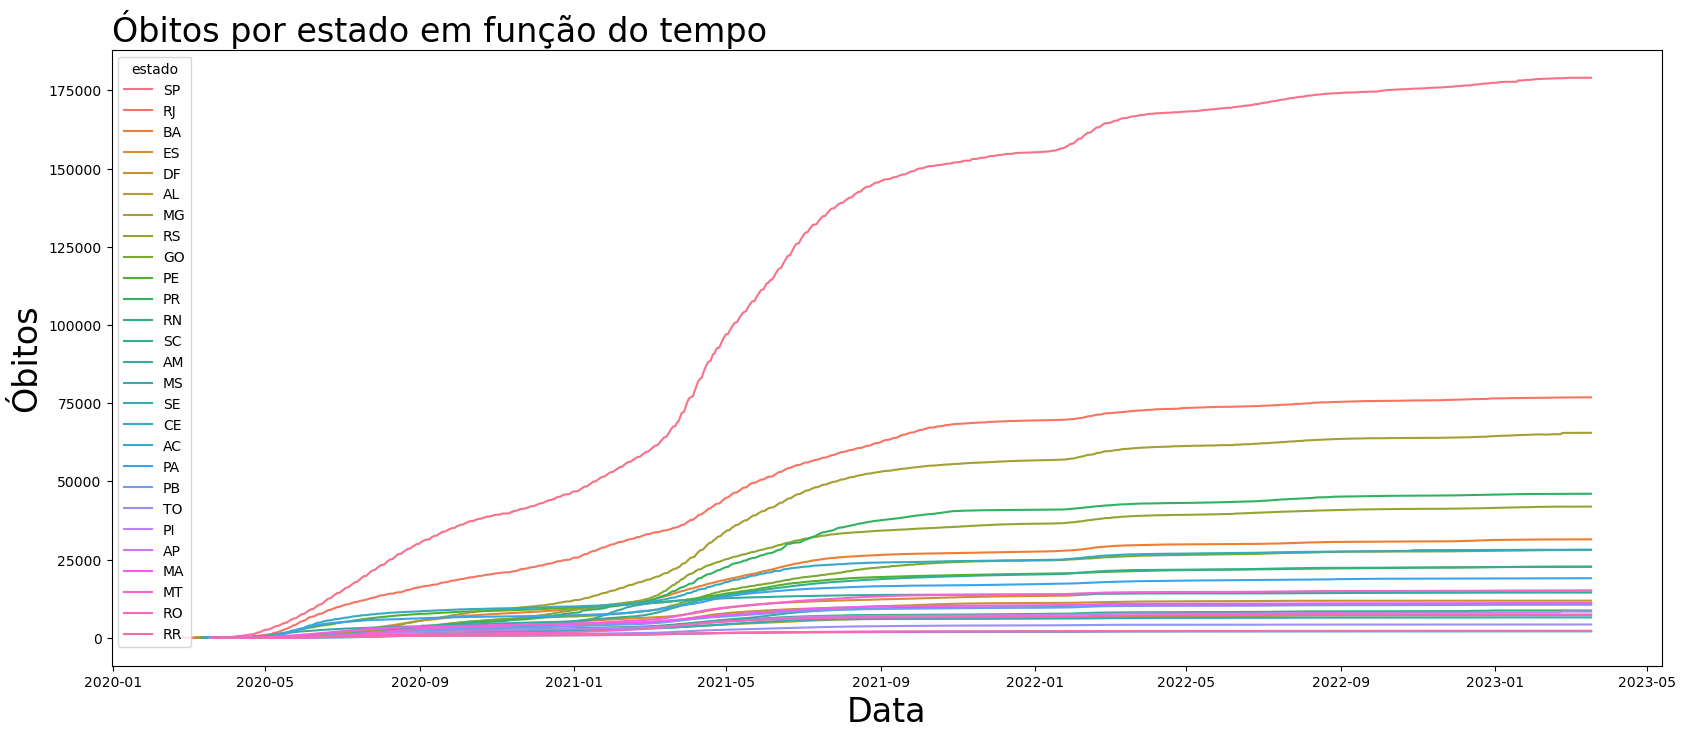

In [148]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)
plt.show()

Primeiro plot mostrando óbitos em todos os estados brasileiros em função do tempo.

In [149]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Selecionamos apenas dados do estado de São Paulo. Ele foi o escolhido pois se trata do estado com maiores números de casos.

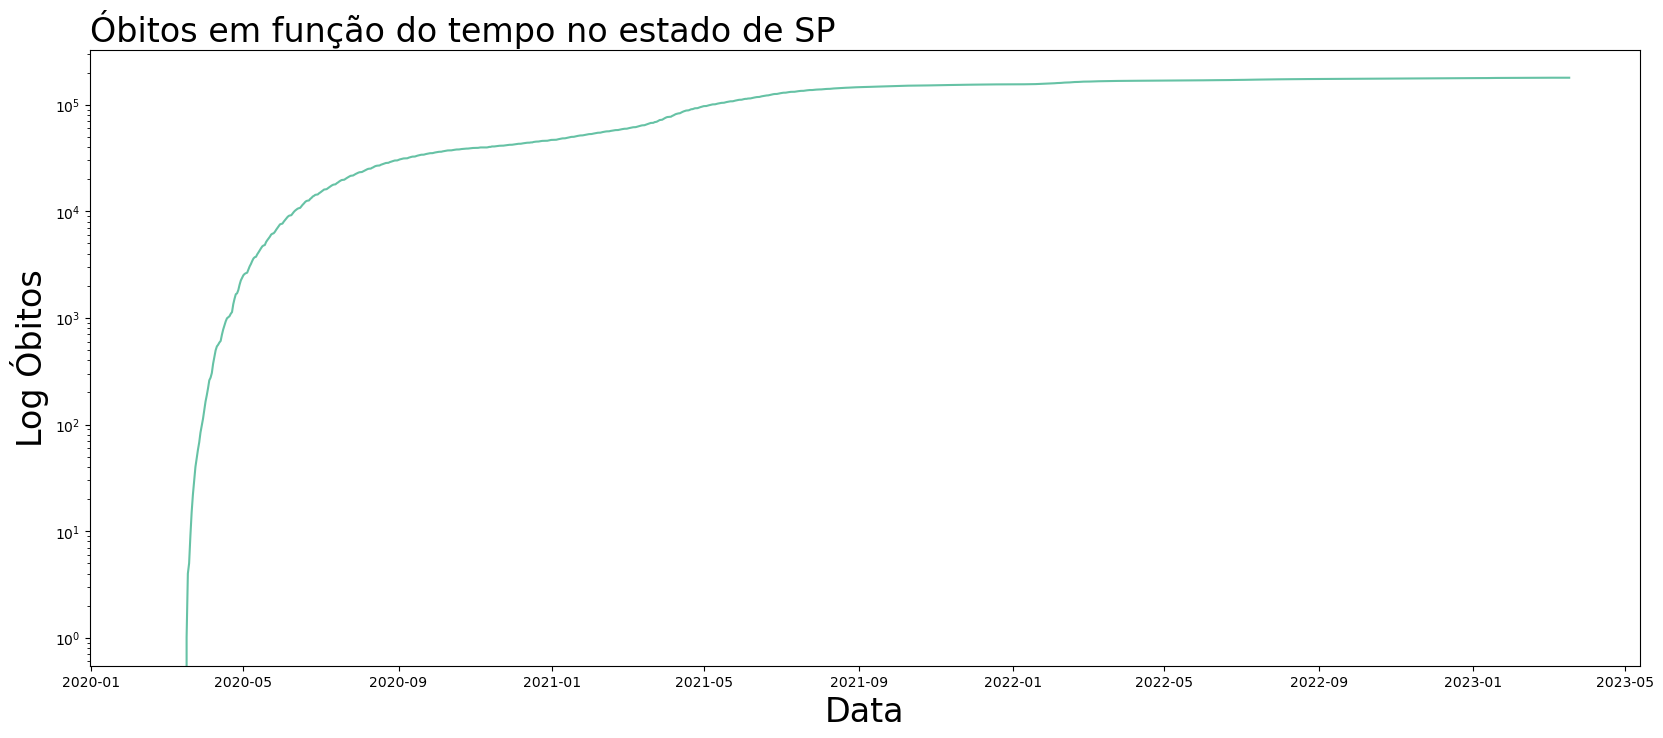

In [150]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', data=df_sp)
fig.set_title('Óbitos em função do tempo no estado de SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')
plt.show()

Podemos perceber que em 2022 existe uma estabilização de óbitos, tendo em vista o crescimento acelerado no inicio da pandemia.

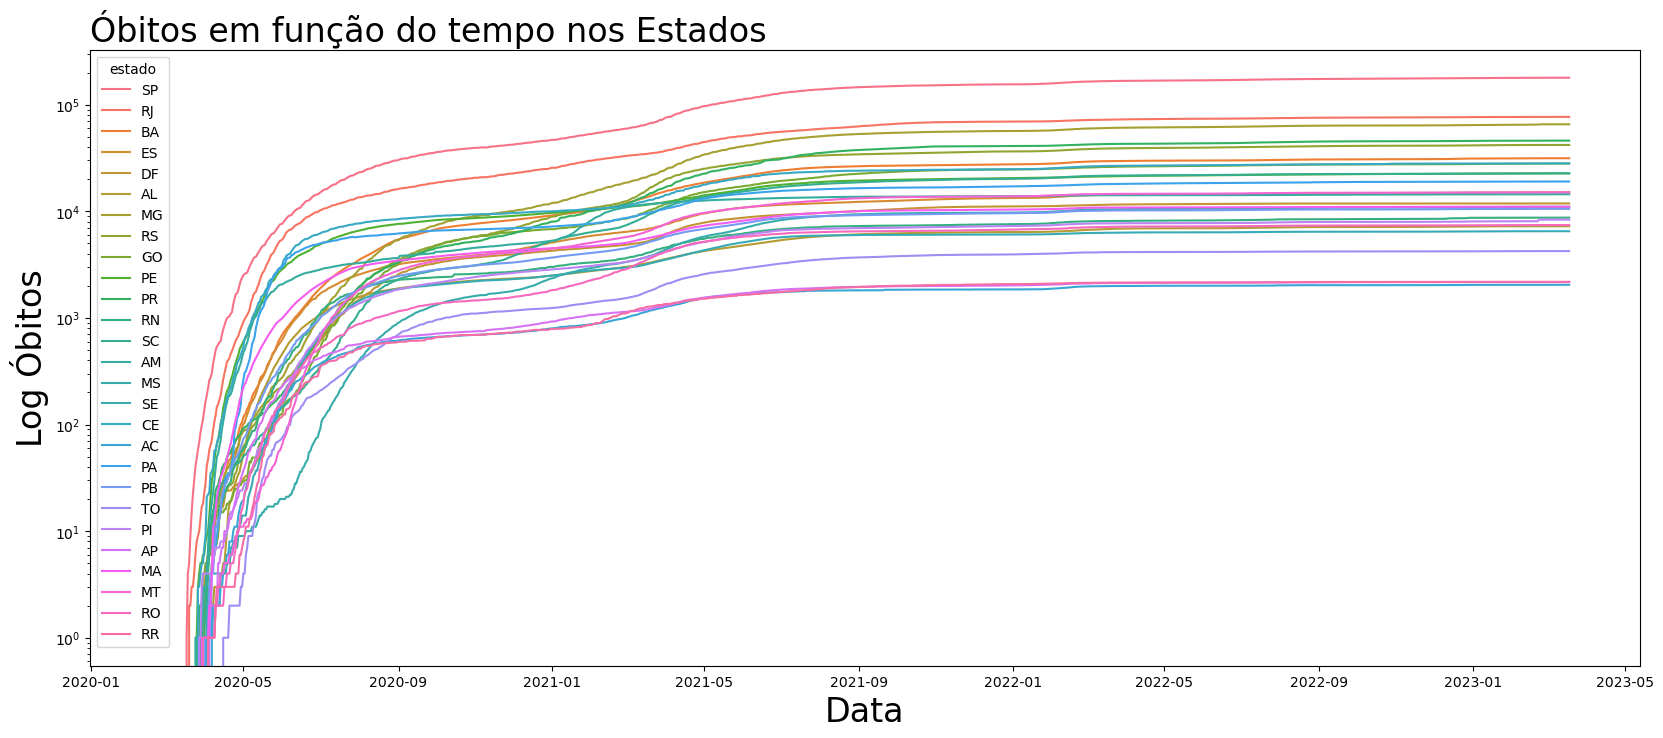

In [151]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos em função do tempo nos Estados', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')
plt.show()

Transição da fase de crescimento para estabilidade, normalmente acontece após medidas de controle, imunização, ou porque a maioria da população suscetível já foi atingida.

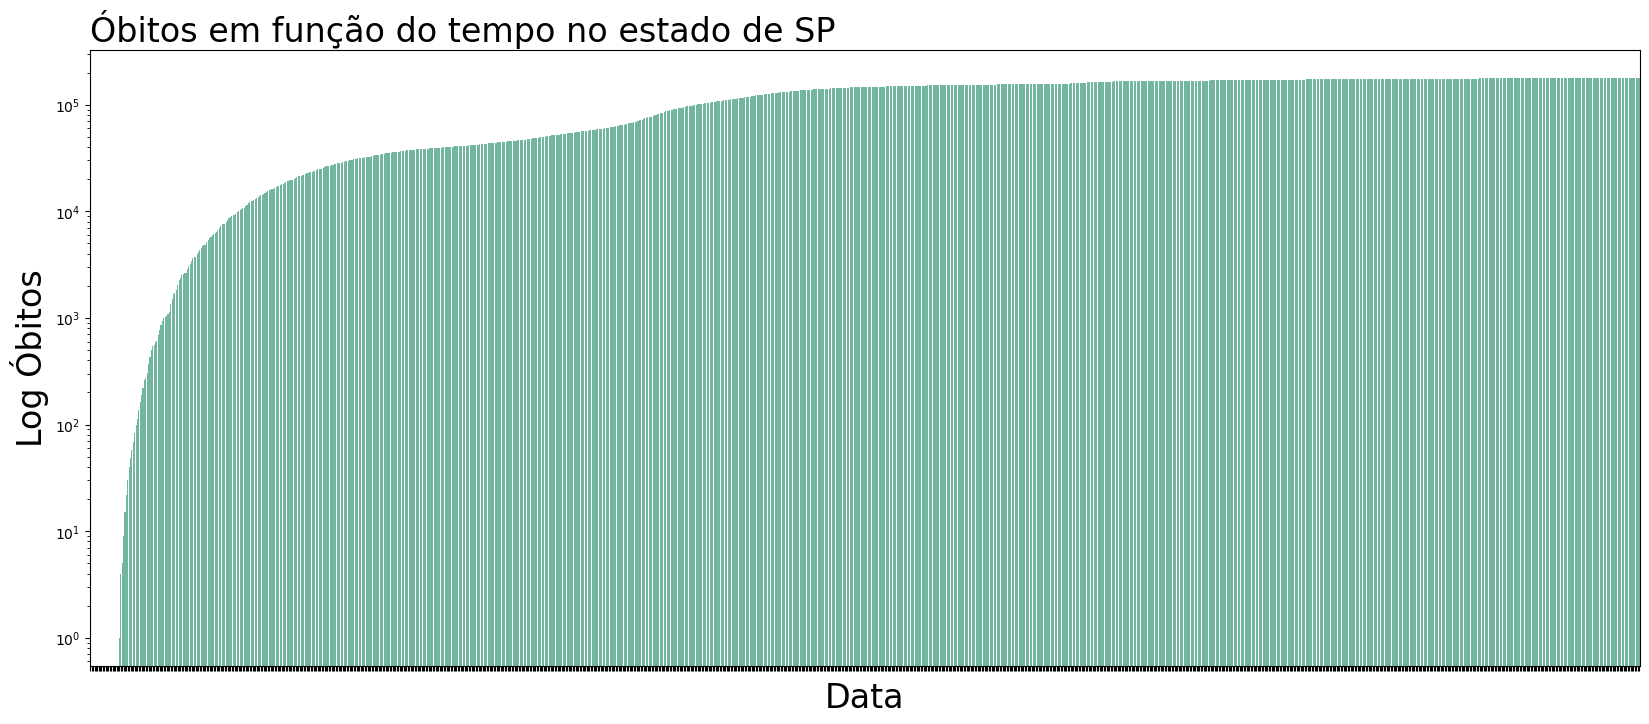

In [152]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x='data', y='Obitos', data=df_sp)
fig.set_title('Óbitos em função do tempo no estado de SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_xticklabels([])
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')
plt.show()

Plot com barras para facilitar a visualização. Percebe-se que os óbitos chegam a um platô, ou seja, número de óbitos estabilizados com o passar do tempo.

In [153]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


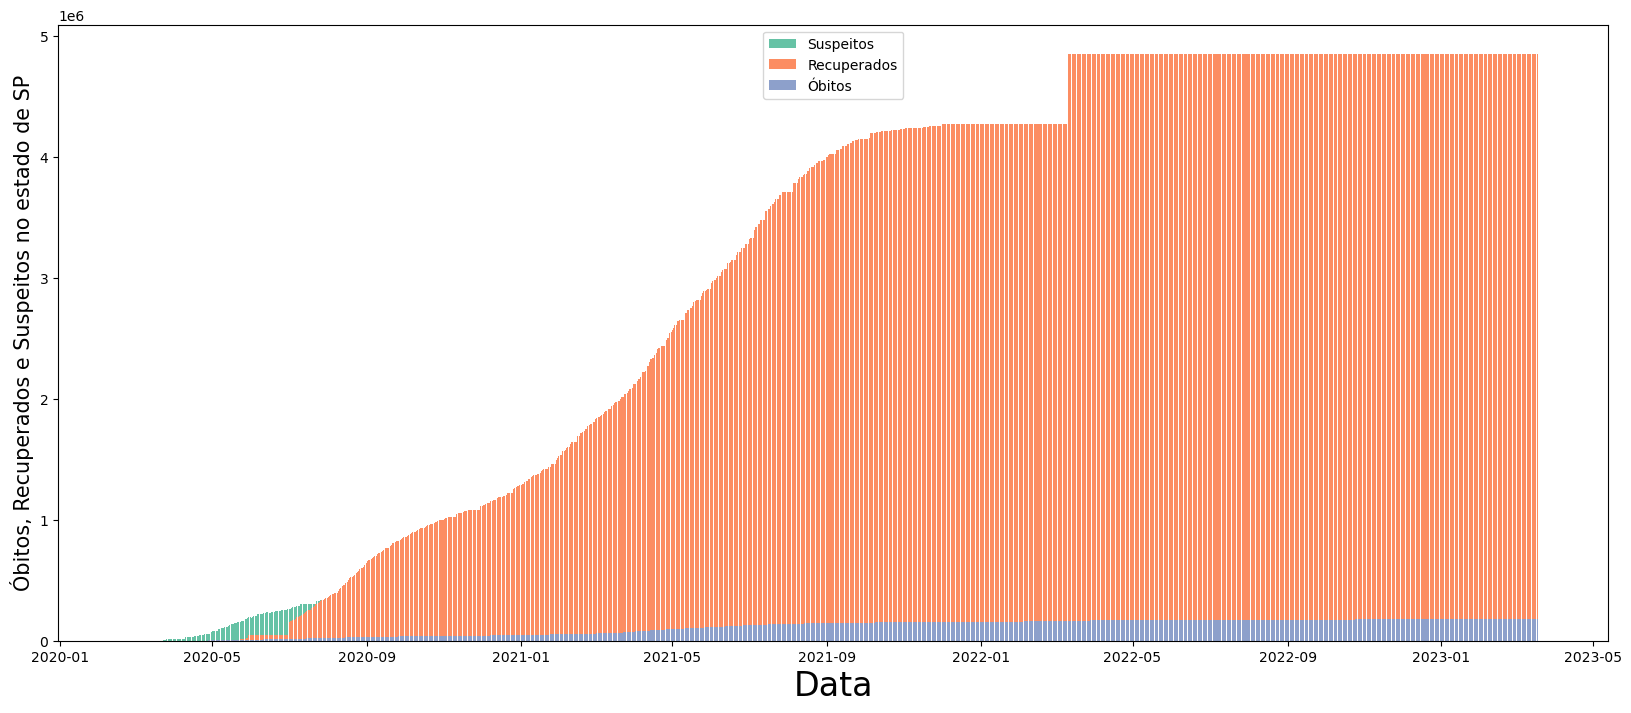

In [154]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp['data'], df_sp['suspeitos'], label='Suspeitos')
plt.bar(df_sp['data'], df_sp['recuperados'], label='Recuperados')
plt.bar(df_sp['data'], df_sp['Obitos'], label='Óbitos')

plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP', fontsize=15, rotation=90)

plt.gca().set_yscale("linear")
plt.legend()
plt.show()

Observa-se a ausência de dados de recuperados até junho de 2020. Isso ocorre porque, naquele período, a Prefeitura de São Paulo passou a liberar apenas informações sobre pacientes internados, enquanto aqueles orientados a tratamento domiciliar não tinham seus dados incluídos.

In [155]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue=None):
    ax = sns.lineplot(x=x, y=y, data=dataset, hue=hue)
    ax.set_title(titulo, fontsize=20, loc='left')
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    plt.legend()

    
def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    fig = plt.bar(dataset[x], dataset[y], data=dataset)
    plt.title(titulo, fontsize=20, loc='left')
    plt.ylabel(ylabel, fontsize=20, rotation=90)
    plt.xlabel(xlabel, fontsize=20)

Criação de função para otimizar o tempo de plotagem, tendo em vista que utilizaremos bastantes plots durante a análise.

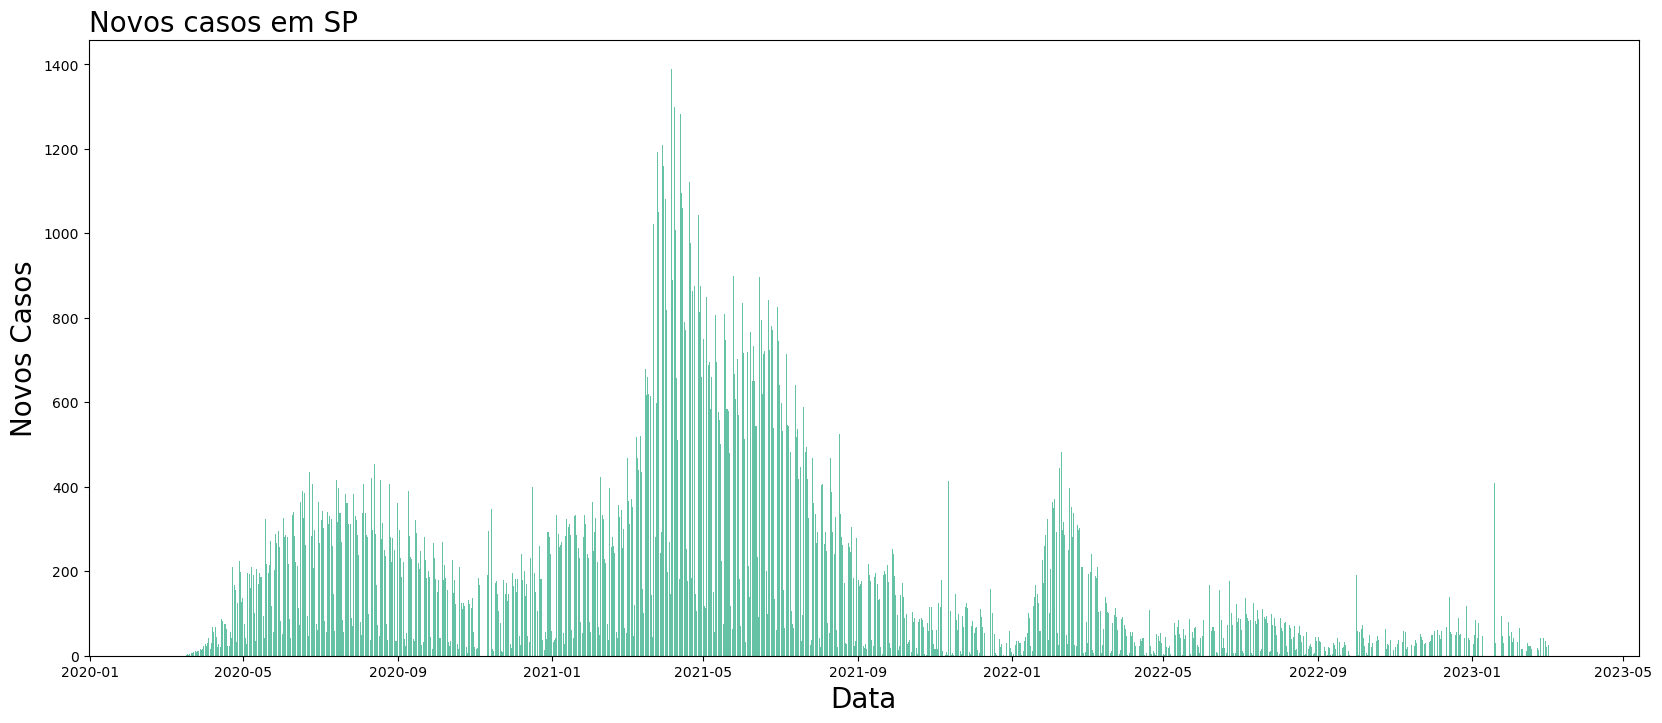

In [156]:
plt.figure(figsize=(20,8))
plotar_barra('Novos casos em SP', 'Data', 'Novos Casos', 'data', 'novosObitos', df_sp)

Aqui percebemos que há uma diferença muito grande relacionado a novos casos, talvez por divulgação de dados em dias específicos da semana, iremos verificar posteriormente.

In [157]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['Obitos'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


Criação de duas novas features: Aceleração de casos e aceleração de óbitos.

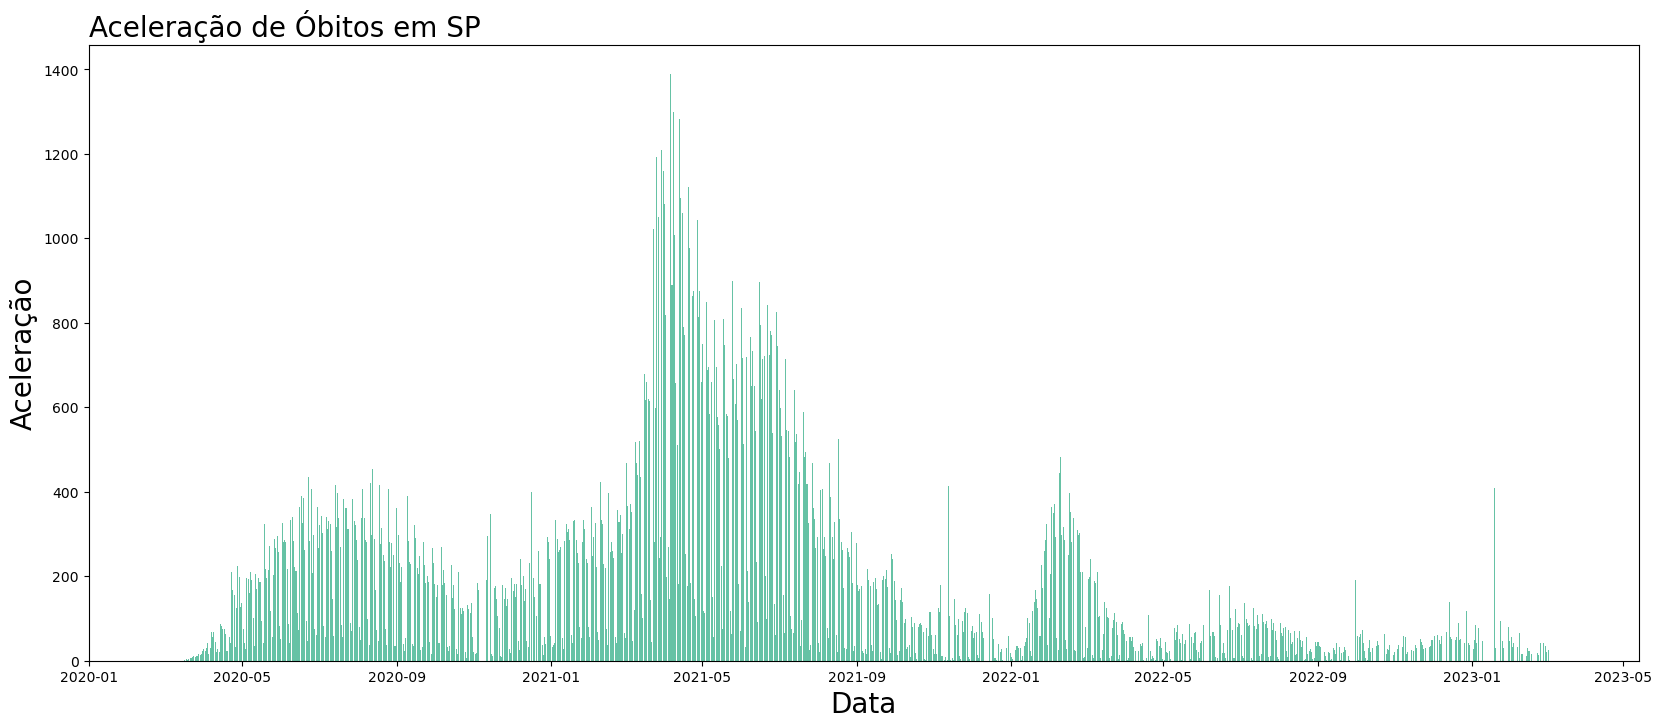

In [158]:
plt.figure(figsize=(20,8))
plotar_barra('Aceleração de Óbitos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoObitos', df_sp)

Observa-se uma grande variação na aceleração dos casos, o que reforça a ideia de que os dados eram divulgados em dias específicos, e não diariamente de forma contínua.

In [159]:
df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(7, center=False).mean()
df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(14, center=False).mean()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN


Criação de duas médias móveis para suavizar os dados e reduzir o ruído na análise.

<BarContainer object of 1118 artists>

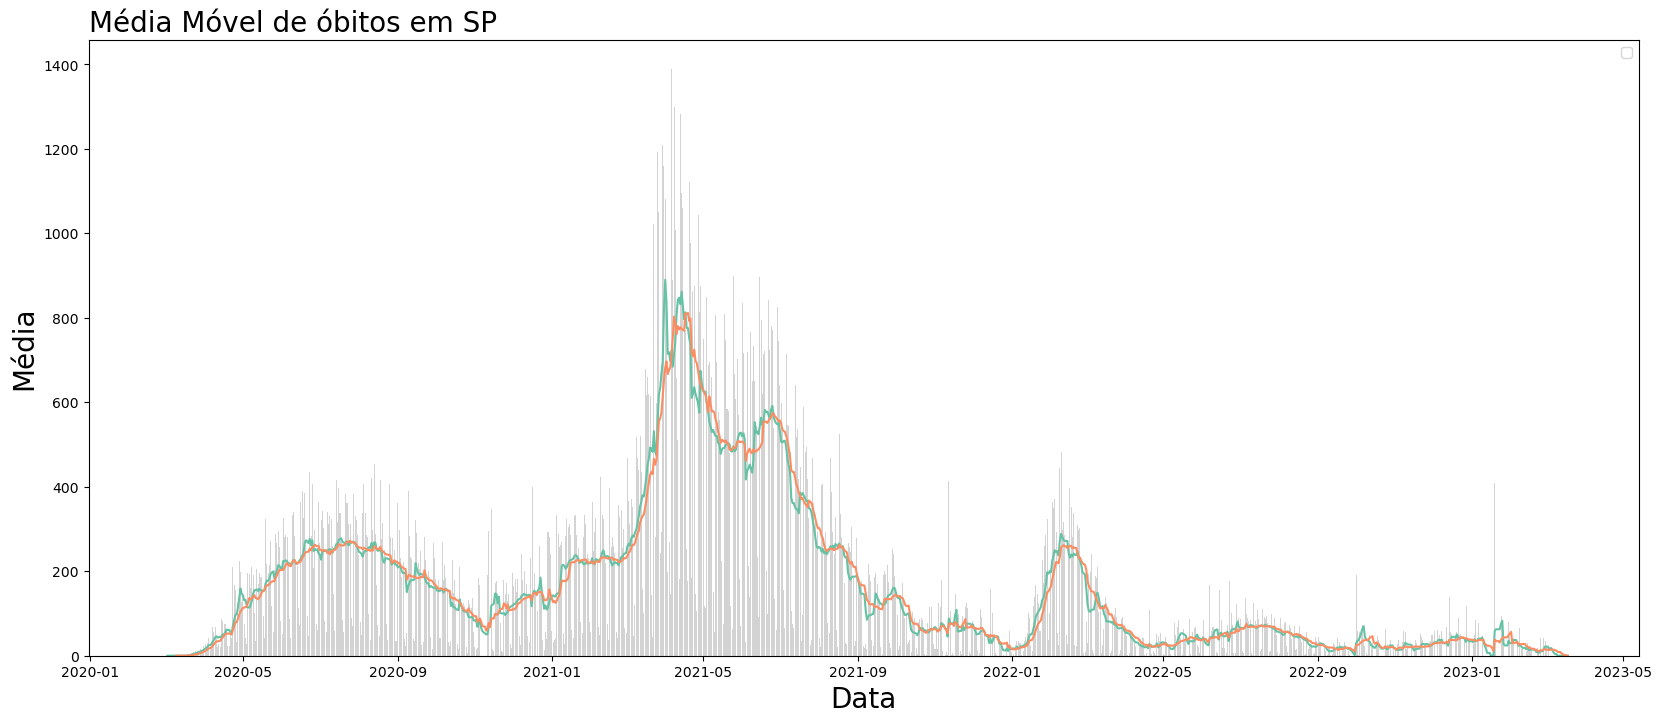

In [160]:
plt.figure(figsize=(20,8))
plotar_linha("Média Móvel de óbitos em SP", 'Data', 'Média', 'data', 'mediaObitos', df_sp)
plotar_linha("Média Móvel de óbitos em SP", 'Data', 'Média', 'data', 'mediaObitos_14', df_sp)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

Média de casos em relação ao tempo.

In [161]:
from pandas.plotting import autocorrelation_plot

Importação de uma função no pandas para verificarmos a autocorrelação dos dados.

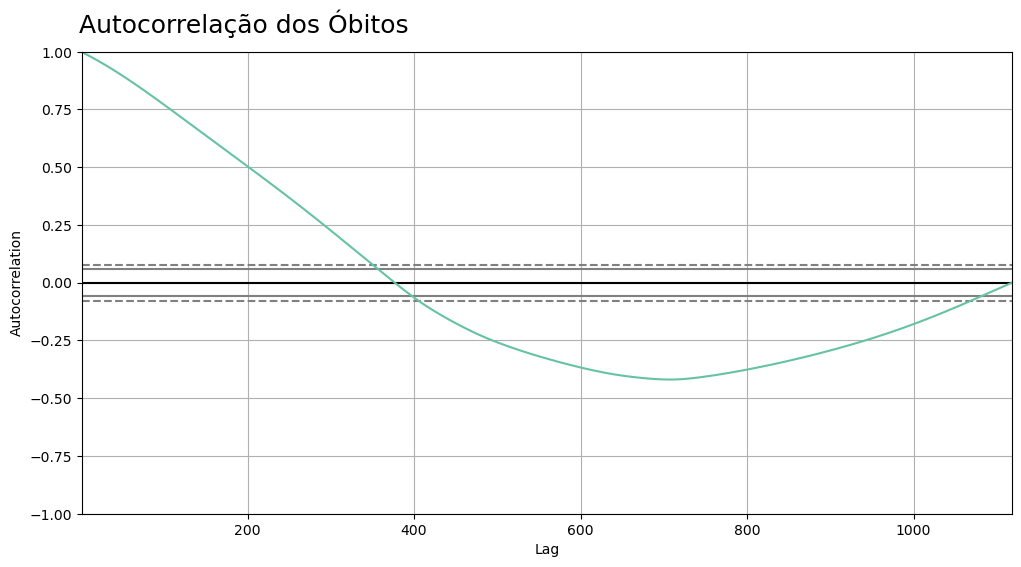

In [162]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação dos Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['Obitos'])
ax = ax

Observa-se uma autocorrelação inicial bastante alta no início da pandemia. Com o passar do tempo, esse índice diminui significativamente, chegando a apresentar valores negativos em alguns momentos, devido ao crescimento acelerado da contaminação.

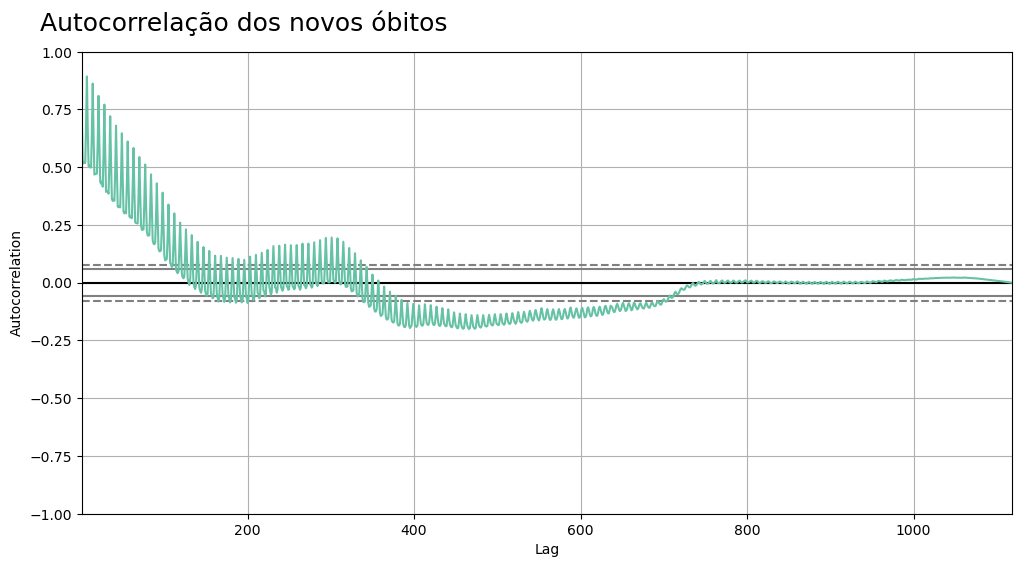

In [163]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação dos novos óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax = ax

A autocorrelação de novos óbitos segue o mesmo padrão observado para os óbitos acumulados.

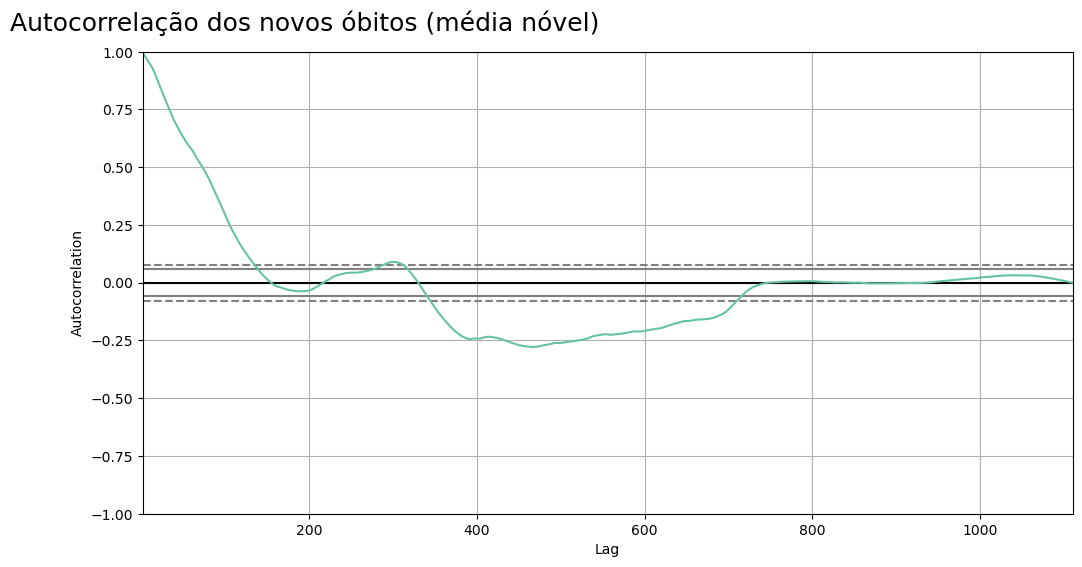

In [164]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação dos novos óbitos (média nóvel)', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:])
ax = ax

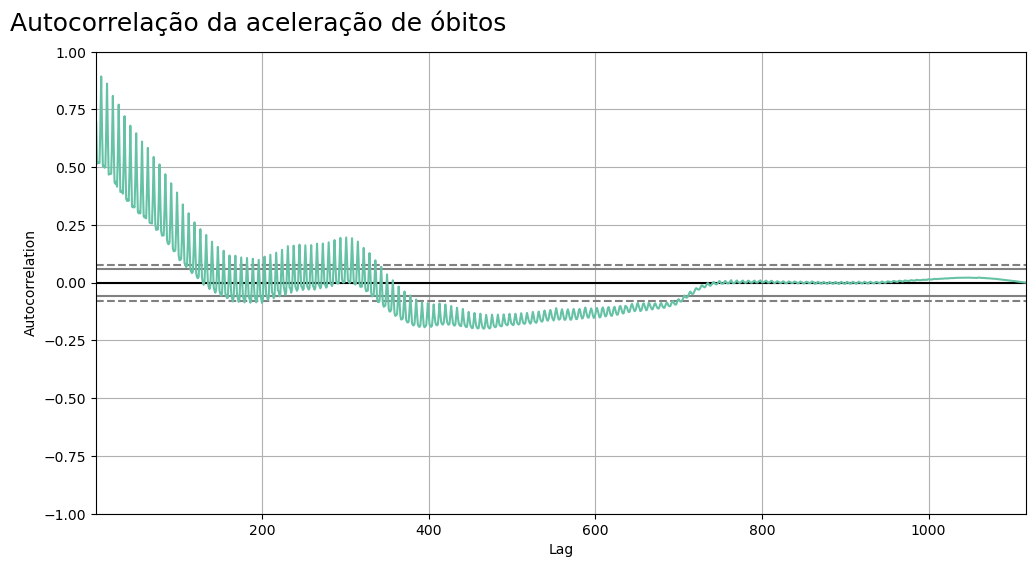

In [165]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])
ax = ax

In [166]:
df_sp['mes'] = pd.to_datetime(df_sp['data']).dt.month
df_sp['dia_da_semana'] = pd.to_datetime(df_sp['data']).dt.day_name()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2,Saturday


In [167]:
dias_traduzidos = {"Monday": "Segunda", "Tuesday":"Terça", "Wednesday":"Quarta", "Thursday":"Quinta", "Friday": "Sexta",
                  "Saturday": "Sábado", "Sunday":"Domingo"}

In [168]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2,Sábado


Adicionamos duas colunas adicionais — mês e dia da semana — para analisar as variações de casos ao longo dos dias.

In [169]:
agrupados_sp = df_sp.groupby('dia_da_semana')[['Obitos', 'novosObitos', 'aceleracaoObitos']].mean().round()

In [170]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp.head()

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,111006.0,48.0,48.0,Domingo
Quarta,110807.0,216.0,216.0,Quarta
Quinta,111019.0,212.0,212.0,Quinta
Segunda,111041.0,36.0,36.0,Segunda
Sexta,111213.0,193.0,193.0,Sexta


In [171]:
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

In [172]:
agrupados_sp.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,111006.0,48.0,48.0,Domingo
Segunda,111041.0,36.0,36.0,Segunda
Terça,110591.0,244.0,245.0,Terça
Quarta,110807.0,216.0,216.0,Quarta
Quinta,111019.0,212.0,212.0,Quinta
Sexta,111213.0,193.0,193.0,Sexta
Sábado,111384.0,171.0,171.0,Sábado


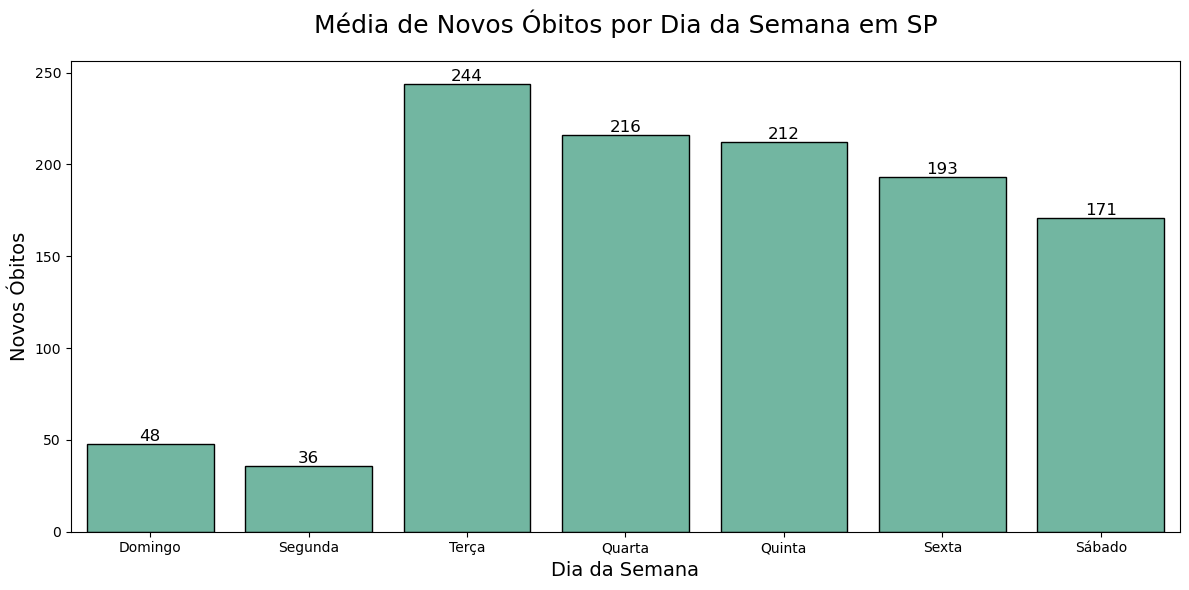

In [173]:
plt.figure(figsize=(12,6))
sns.set_palette("Set2")

ax = sns.barplot(
    x='dia_da_semana', 
    y='novosObitos', 
    data=agrupados_sp,
    edgecolor='black' 
)

ax.set_title("Média de Novos Óbitos por Dia da Semana em SP", fontsize=18, pad=20)
ax.set_xlabel("Dia da Semana", fontsize=14)
ax.set_ylabel("Novos Óbitos", fontsize=14)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        fontsize=12
    )

plt.tight_layout()
plt.show()

Observa-se que, aos domingos e segundas-feiras, os números são significativamente mais baixos em comparação com os demais dias da semana, possivelmente devido aos plantões e à forma como os dados são liberados.

In [174]:
def criar_features(df, label=None):
    df = df.copy()
    df['data'] = pd.to_datetime(df['data']) 

    df['diasemana'] = df['data'].dt.dayofweek      
    df['mes'] = df['data'].dt.month                
    df['diames'] = df['data'].dt.day               

    X = df[['diasemana', 'mes', 'diames']]

    if label is not None:
        y = df[label]
        return X, y
    return X

Função para criação de novas features.

In [175]:
X, y = criar_features(df_sp, 'Obitos')
df_final = pd.concat([X,y], axis=1)
df_final.head(10)

,diasemana,mes,diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


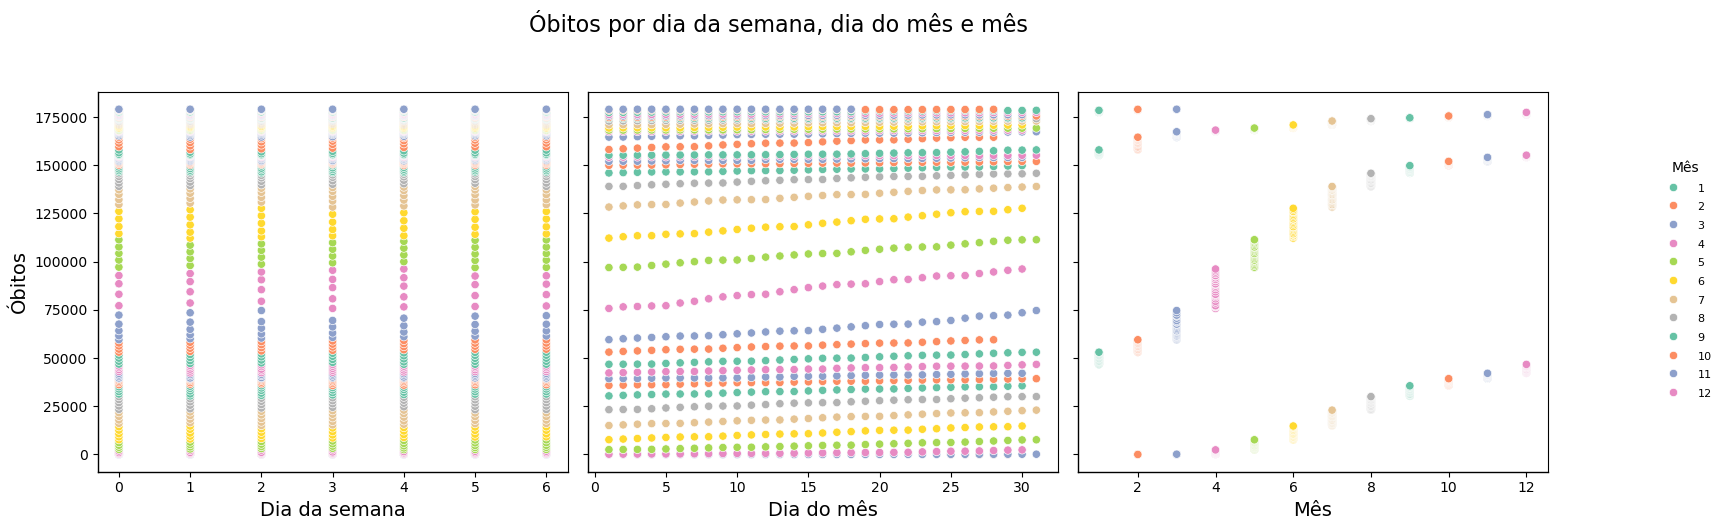

In [176]:
palette = sns.color_palette("Set2", n_colors=df_final['mes'].nunique())

g = sns.pairplot(
    df_final.dropna(),
    hue='mes',
    x_vars=['diasemana', 'diames', 'mes'],
    y_vars='Obitos',
    palette=palette,
    height=5,
    aspect=1.0,
    markers='o'
)
g.axes[0,0].set_xlabel('Dia da semana', fontsize=14)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=14)
g.axes[0,2].set_xlabel('Mês', fontsize=14)
g.axes[0,0].set_ylabel('Óbitos', fontsize=14)

for ax in g.axes.flat:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)

plt.suptitle('Óbitos por dia da semana, dia do mês e mês', fontsize=16, y=1.05)

g._legend.set_title('Mês')
for t in g._legend.texts:
    t.set_fontsize(8)
g._legend.set_bbox_to_anchor((1.05, 0.5)) 
g._legend.set_loc('center left')

plt.tight_layout()
plt.show()

Neste notebook, analisamos a evolução da COVID-19 no estado de São Paulo utilizando séries temporais. Através da análise exploratória e da criação de novas features, conseguimos observar padrões importantes:

O crescimento de casos e óbitos apresentou platôs e acelerações, refletindo mudanças nas políticas de divulgação e na evolução da pandemia.

Houve variações significativas por dia da semana, com domingos e segundas registrando números menores, possivelmente devido a plantões e liberações pontuais de dados.

A autocorrelação inicial era alta, indicando forte dependência temporal, mas diminuiu ao longo do tempo, chegando até a valores negativos durante fases de crescimento acelerado.

Médias móveis permitiram suavizar os dados e reduzir o ruído, facilitando a identificação de tendências e padrões.